# Script for Plotting the Case Study Figures
Figures 10, 11, S4, & S5

## 1. Import Libraries

In [1]:
from datetime import datetime
from itertools import product
from pathlib import Path
from typing import Any
import seaborn as sns 
import joblib
# import keras
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
# import plotly.express as px
# import plotly.graph_objects as go
# import streamlit as st
# import tensorflow as tf
import xarray as xr
from sklearn import metrics
# from sklearn.ensemble import RandomForestClassifier

## 2. Functions 

In [2]:
PHASE_MAP = {
    0: "clear",
    1: "liquid",
    2: "ice",
    3: "mixed",
    4: "drizzle",
    5: "liq_driz",
    6: "rain",
    7: "snow",
    8: "unknown",
}

# Updated PHASE_MAP to exclude 'clear' and 'unknown'
PHASE_MAP_small = {
    1: "liquid",
    2: "ice",
    3: "mixed",
    4: "drizzle",
    5: "liq_driz",
    6: "rain",
    7: "snow"
}

In [3]:
_cblind = sns.color_palette("colorblind")

custom_colors = [
    "white",  # clear (white)
    _cblind[2],  # liquid (dark purple from viridis)
    _cblind[0],  # ice (blue from viridis)
    _cblind[3],  # mixed (greenish-blue from viridis)
    _cblind[9],  # drizzle (light green from viridis)
    _cblind[6],  # liq_driz (yellow from viridis)
    _cblind[8],  # rain (brighter yellow)
    _cblind[5],  # snow (orange-yellow)
    "black",  # unknown (grey)
]

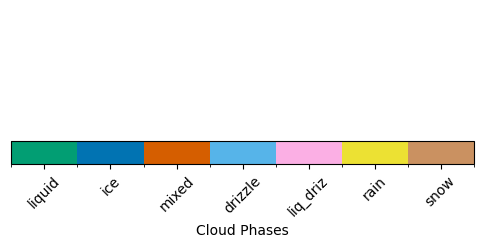

In [ ]:
def create_small_colorbar(axs):
    # Define the custom colors for each phase
    custom_colors = [
        _cblind[2],  # liquid (dark purple from viridis)
        _cblind[0],  # ice (blue from viridis)
        _cblind[3],  # mixed (greenish-blue from viridis)
        _cblind[9],  # drizzle (light green from viridis)
        _cblind[6],  # liq_driz (yellow from viridis)
        _cblind[8],  # rain (brighter yellow)
        _cblind[5],  # snow (orange-yellow)
    ]

    # Create a colormap with distinct colors for each integer value
    cmap = mcolors.ListedColormap(custom_colors)

    # Create a norm for the colorbar to map integer values to the colormap
    bounds = np.arange(1, 9)  # Values 1 to 7 (corresponding to the phases)
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    # Define the phase labels
    PHASE_MAP_small = {
        1: "liquid",
        2: "ice",
        3: "mixed",
        4: "drizzle",
        5: "liq_driz",
        6: "rain",
        7: "snow"
    }

    

    # Create the colorbar using the colormap, norm, and set the ticks and labels
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), ax=axs, orientation='horizontal', ticks=np.arange(1, 8))
    cbar.set_label('Cloud Phases')
    cbar.set_ticks(np.arange(1, 8)+.5)  # Set ticks for each phase
    cbar.ax.set_xticklabels([PHASE_MAP_small[i] for i in range(1, 8)], rotation=45)  # Set custom labels

    
# Create a figure and axis to display the colorbar
# fig, ax = plt.subplots(figsize=(6,2))
# create_small_colorbar(ax)
# ax.axis('off')
# plt.show()


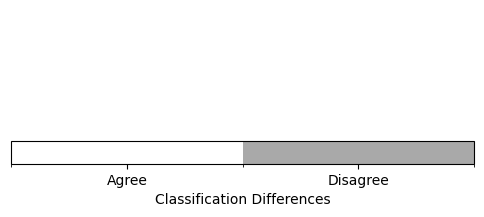

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

def create_tf_colorbar(axs):
    # Define the custom colors for each phase
    custom_colors = [
        "white",  # 
        "darkgray"   # 
    ]

    # Create a colormap with distinct colors for each integer value
    cmap = mcolors.ListedColormap(custom_colors)

    # Create a norm for the colorbar to map integer values to the colormap
    bounds = np.array([0, 1, 2])  # Bounds should cover values 0 to 1 (use 2 for the last boundary)
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    # Define the phase labels
    PHASE_MAP_small = {
        0: "Agree",
        1: "Disagree",
    }

    # Create the colorbar using the colormap, norm, and set the ticks and labels
    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), ax=axs, orientation='horizontal', ticks=[0, 1])
    cbar.set_label('Classification Differences')
    cbar.set_ticks([0.5, 1.5])  # Set ticks for each phase
    cbar.ax.set_xticklabels([PHASE_MAP_small[i] for i in range(0, 2)])  # Set custom labels

# Create a figure and axis to display the colorbar
# fig, ax = plt.subplots(figsize=(6, 2))
# create_tf_colorbar(ax)
# ax.axis('off')
# plt.show()


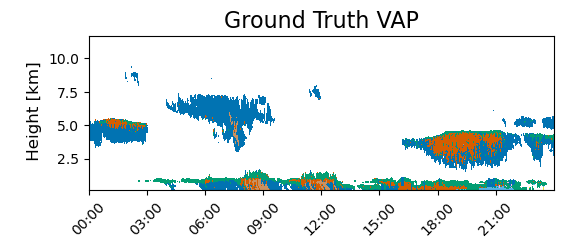

In [ ]:
def create_timeseries_no_unknown(variable_name, axs, ds, PHASE_MAP, custom_colors):
    """
    Creates a timeseries plot along with a confusion matrix and custom colorbar.
    
    Parameters:
    axs (matplotlib.axes.Axes): The axis to plot the figure on.
    ds (xarray.Dataset): The dataset containing the timeseries data.
    PHASE_MAP (dict): Dictionary mapping the phase labels to categories.
    custom_colors (list): Custom colors to apply to different phases in the timeseries.
    """
    # Extract phase values and labels
    phase_values = list(PHASE_MAP.keys())
    phase_labels = list(PHASE_MAP.values())

    # Define the integer range for levels
    min_val = int(ds[variable_name].min().values)
    max_val = int(ds[variable_name].max().values)

    # Create a colormap with distinct colors for each integer value
    cmap = mcolors.ListedColormap(custom_colors)

    # Plot the timeseries with the colormap
    plot = ds[variable_name].transpose().plot(ax=axs, cmap=cmap, 
                                                    levels=np.arange(len(phase_values)+1), 
                                                    add_colorbar=False)

    # Add labels and title for the timeseries plot
    axs.set_xlabel('', fontsize=12)
    

    if variable_name == 'cloud_phase_mplgr':
        axs.set_title('Ground Truth VAP', fontsize=16)
        axs.set_ylabel('\n Height [km]', fontsize=12)
        
    if 'rf' in variable_name:
        axs.set_title('RF', fontsize=16)
        axs.set_ylabel('', fontsize=12)
        #axs.tick_params(axis='y', labelsize=0)
    if 'cnn_20240501_090456' in variable_name:
        axs.set_title('CNN', fontsize=16)
        axs.set_ylabel('', fontsize=12)
        #axs.tick_params(axis='y', labelsize=0)
    if 'cnn_20240429_213223' in variable_name:
        axs.set_title('CNN-ICD', fontsize=16)
        axs.set_ylabel('', fontsize=12)
        #axs.tick_params(axis='y', labelsize=0)
    if 'mlp' in variable_name:
        axs.set_title('MLP', fontsize=16)
        axs.set_ylabel('', fontsize=12)
        #axs.tick_params(axis='y', labelsize=0)
    
    axs.tick_params(axis='x', rotation=45, labelsize=10)
    axs.tick_params(axis='y', labelsize=10)
    axs.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
# # Example usage:
# BASE_PATH = Path("/home/levin/github/ml-for-cloudphase-amt-2024/src/processing/data/predictions/")
# FILE_GLOB = "nsathermocldphaseC1.c1.20210831.000000.nc"
# file_path = BASE_PATH / FILE_GLOB
# ds = xr.open_dataset(file_path)
# fig, axs = plt.subplots(figsize=(6,2))
# create_timeseries_no_unknown('cloud_phase_mplgr',axs, ds, PHASE_MAP, custom_colors)
# plt.show()

## Figure 10
Edit Base Path and Filename in cell below, you may also need to change the filepath to the style.mplstyle file

In [8]:
BASE_PATH = Path("/home/levin/github/ml-for-cloudphase-amt-2024/src/processing/data/predictions/")
FILE_GLOB = "nsathermocldphaseC1.c1.20210905.000000.nc"

# Construct the full file path
file_path = BASE_PATH / FILE_GLOB

# Open the NetCDF file with xarray
ds = xr.open_dataset(file_path)

In [9]:
# Define the positions for each subplot
# The positions are defined as [left, bottom, width, height]
heights = 0.2
hist_pos = 0.33
conf_pos = .5
matrix_pos = 0.71

height = 0.15
width = 0.18#0.14

start_height = 0.15

col1 = 0.1
col2 = 0.3
col3 = 0.5
col4 = 0.7
col5 = 0.9
x = 0.07

positions = [
    # Row 1 Time Series
    # [col1, start_height +  heights * 3, width, height],   # Subplot 0
    # [col2, start_height +  heights * 3, width, height],   # Subplot 1
    # [col3, start_height +  heights * 3, width, height],   # Subplot 2
    # [col4, start_height +  heights * 3, width, height],   # Subplot 3

    # Row 2 Histogram
    [col1, start_height +  heights * 2, width, height],  # Subplot 5
    [col2, start_height +  heights * 2, width, height],  # Subplot 6
    [col3, start_height +  heights * 2, width, height],  # Subplot 7
    [col4, start_height +  heights * 2, width, height],  # Subplot 8
    [col5, start_height +  heights * 2, width, height],  # Subplot 8
    # Row 3 Confidence Time Series
    #[col1, start_height +  heights * 1, width, height],   # Subplot 9
    [col2, start_height +  heights * 1, width, height],   # Subplot 10
    [col3, start_height +  heights * 1, width, height],  # Subplot 11
    [col4, start_height +  heights * 1, width, height],   # Subplot 12
    [col5, start_height +  heights * 1, width, height],   # Subplot 12
    # Row 4 Matrix
    
    #[col1, start_height, width, height],  # Subplot 13
    [col2, start_height, width, height],  # Subplot 14
    [col3, start_height, width, height],  # Subplot 15
    [col4, start_height, width, height],  # Subplot 16
    [col5, start_height, width, height],  # Subplot 16
    # Colorbar
    [0.05, start_height +  heights * 1.6, 0.2, 0.13], # Subplot 4
    # Colorbar
    [0.05, start_height +  heights * 0.1, 0.2, 0.13] # Subplot 17
]

letters = ['(a)', '(b)', '(c)', '(d)','(e)', '(f)', '(g)', '(h)', '(i)', '(j)', '(k)','(l)', '(m)', '','']

Case Study of Model Comparison 
 September 05, 2021, ARM Site nsa


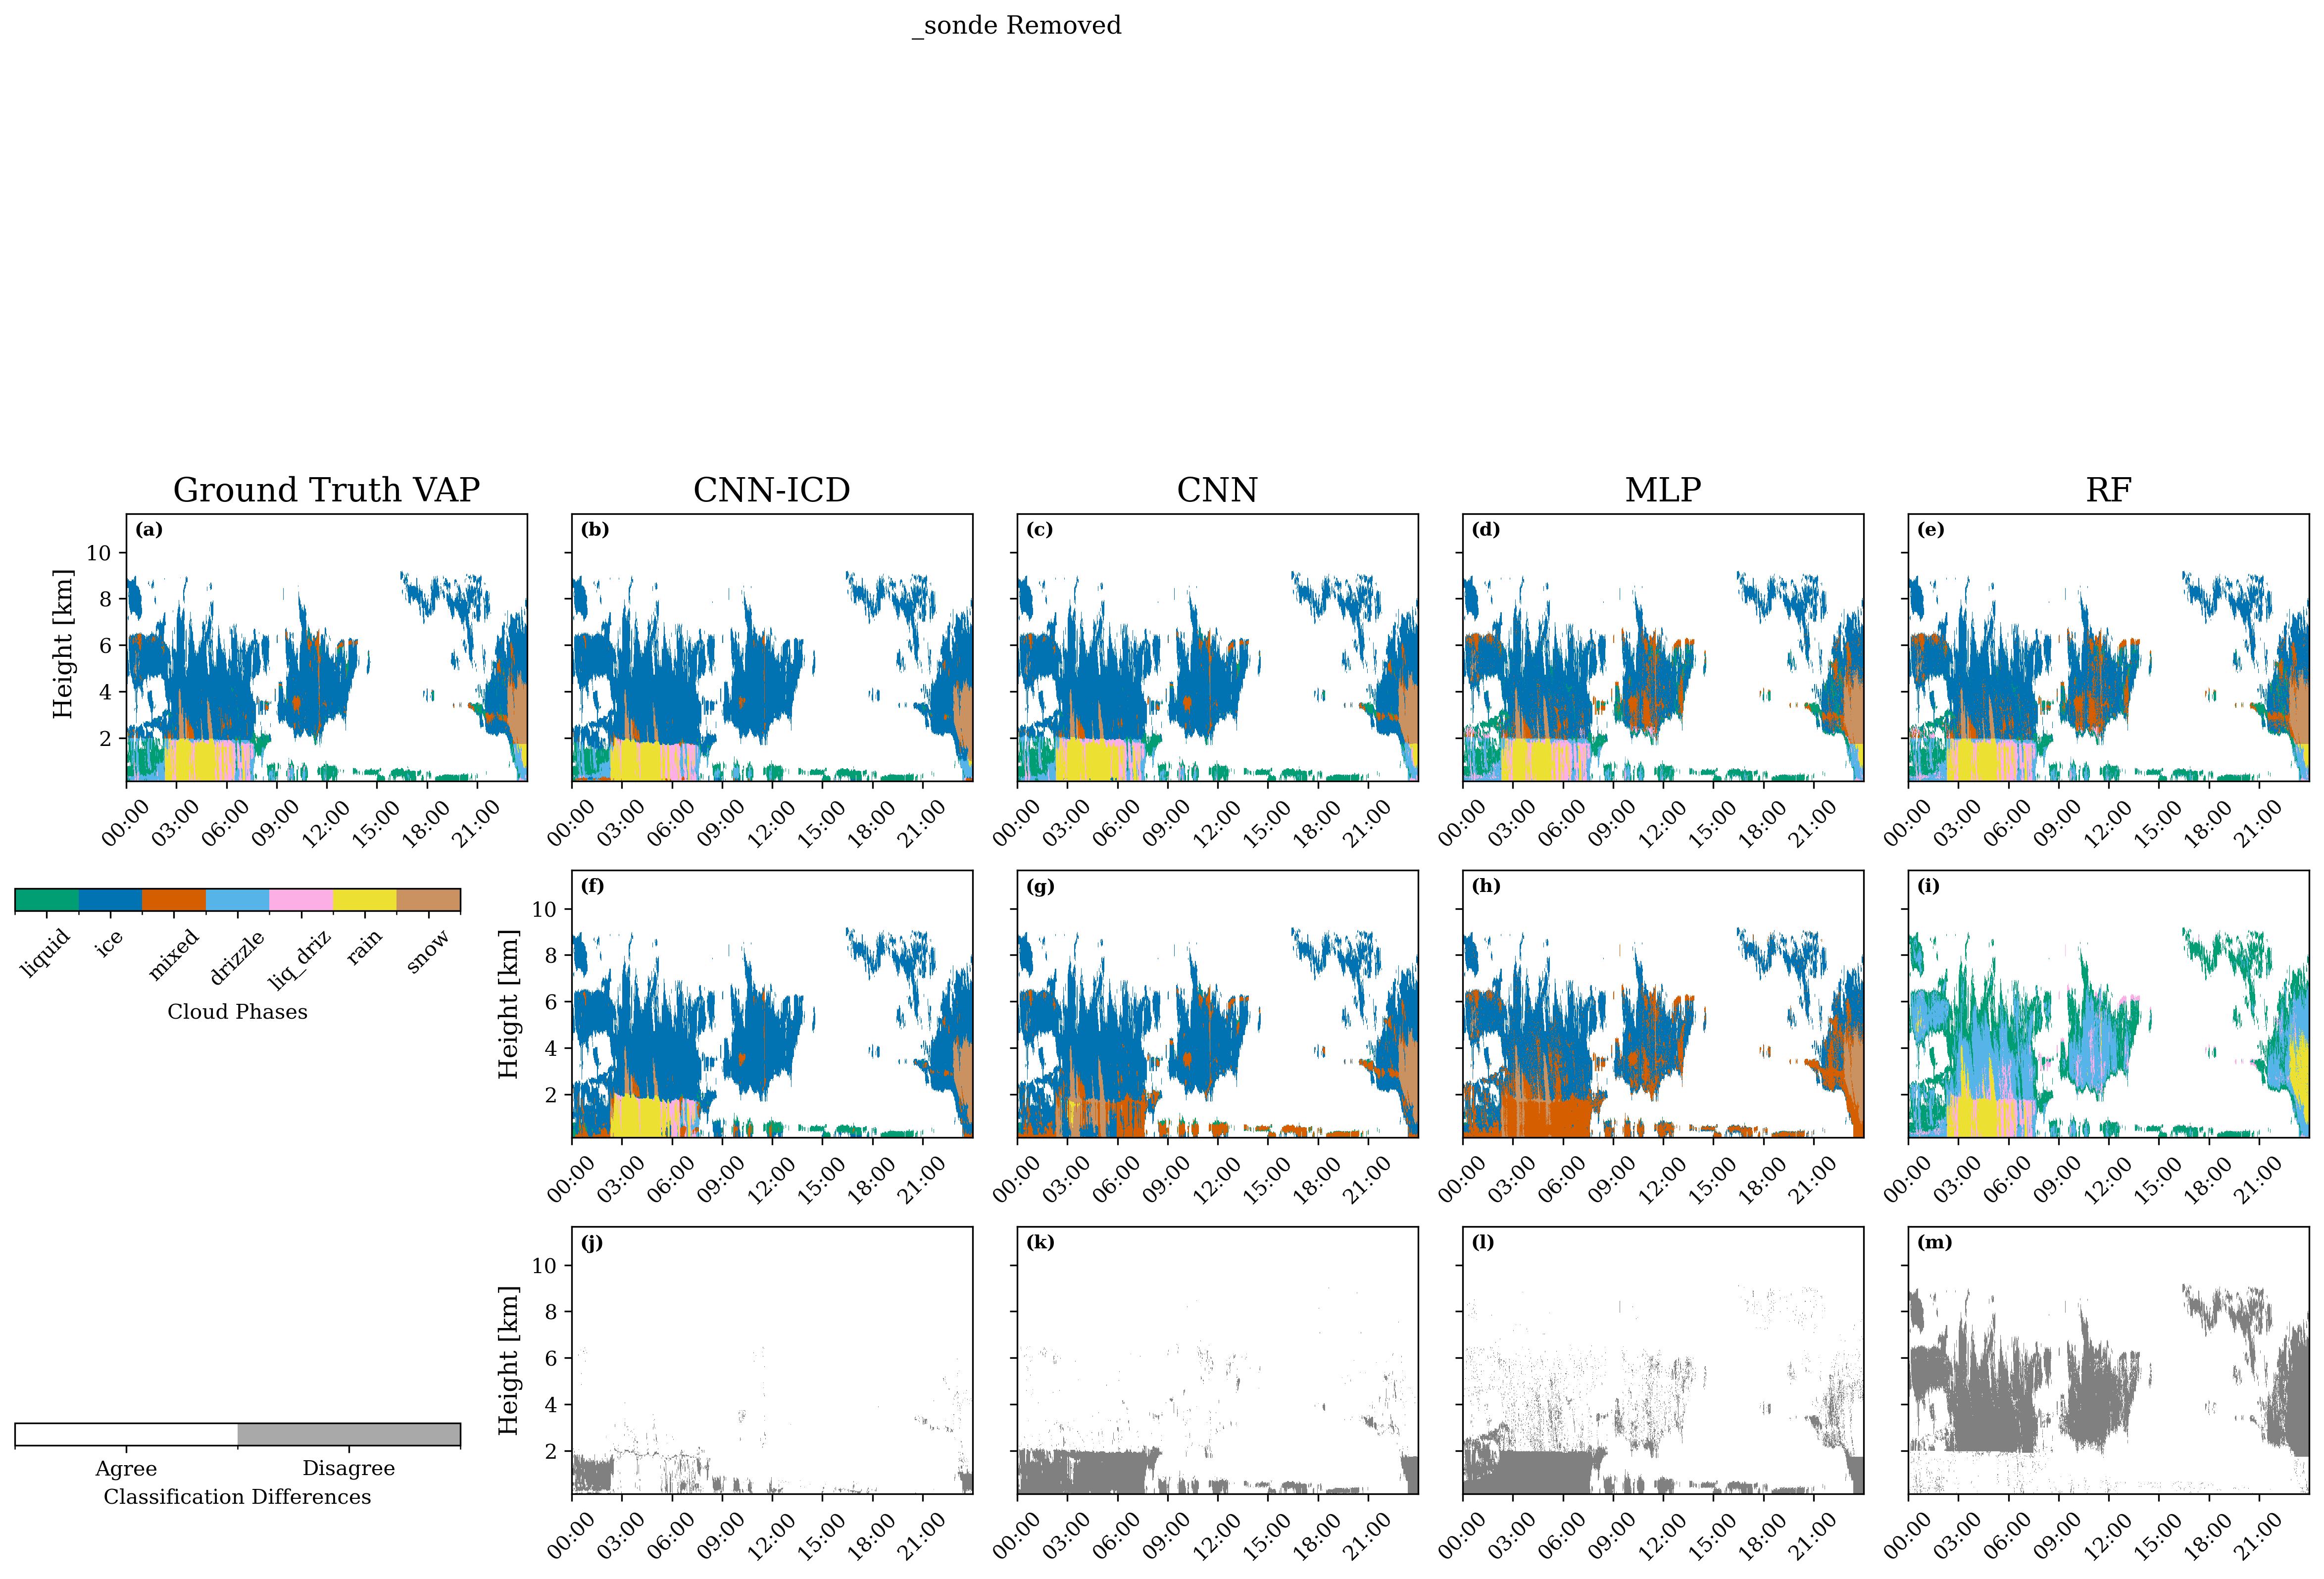

In [10]:
with plt.style.context("/home/goldberger/style.mplstyle"):
    # Create a figure
    fig = plt.figure(figsize=(15, 12))

    print('Case Study of Model Comparison \n ' + pd.to_datetime(ds.time[0].values).strftime('%B %d, %Y') + ', ARM Site ' + FILE_GLOB[0:3])

    # Create subplots
    axs = []
    for pos in positions:
        ax = fig.add_axes(pos)  # Create an axes at the specified position
        axs.append(ax)

    # Colorbar
    create_small_colorbar(axs[13])
    axs[13].axis('off')
    create_tf_colorbar(axs[14])#create_confidence_timeseries_colorbar('cnn_20240501_090456_confidence', axs[17], ds)
    axs[14].axis('off')

    # VAP Data
    create_timeseries_no_unknown('cloud_phase_mplgr',axs[0], ds, PHASE_MAP, custom_colors)
    # CNN with 2D dropouts
    create_timeseries_no_unknown('cnn_20240429_213223',axs[1], ds, PHASE_MAP, custom_colors); axs[1].set_yticklabels([]);# axs[1].set_xticklabels([])
    # CNN
    create_timeseries_no_unknown('cnn_20240501_090456',axs[2], ds, PHASE_MAP, custom_colors); axs[2].set_yticklabels([]);# axs[2].set_xticklabels([])
    # MLP
    create_timeseries_no_unknown('mlp_1600k_20240514_052837',axs[3], ds, PHASE_MAP, custom_colors); axs[3].set_yticklabels([]);# axs[3].set_xticklabels([])
    # RF
    create_timeseries_no_unknown('rf_1600k_20240514_033147',axs[4], ds, PHASE_MAP, custom_colors); axs[4].set_yticklabels([]);# axs[4].set_xticklabels([])

    # Variable possibilities mpl_b mpl_ldr rad_ref rad_ldr rad_spec rad_mdv sonde mwr mpl rad
    dropout = '_sonde'
    fig.suptitle(dropout + ' Removed')
    #
    # CNN with 2D dropouts
    create_timeseries_no_unknown('cnn_20240429_213223' + dropout,axs[5], ds, PHASE_MAP, custom_colors); axs[5].set_title('');axs[5].set_ylabel('Height [km]')
    # CNN
    create_timeseries_no_unknown('cnn_20240501_090456' + dropout,axs[6], ds, PHASE_MAP, custom_colors); axs[6].set_yticklabels([]); axs[6].set_title('')
    # MLP
    create_timeseries_no_unknown('mlp_1600k_20240514_052837' + dropout,axs[7], ds, PHASE_MAP, custom_colors); axs[7].set_yticklabels([]); axs[7].set_title('')
    # RF
    create_timeseries_no_unknown('rf_1600k_20240514_033147' + dropout,axs[8], ds, PHASE_MAP, custom_colors); axs[8].set_yticklabels([]); axs[8].set_title('')

    # CCN Dropouts
    ax = axs[9]
    ds['dif'] = ds['cnn_20240429_213223'] - ds['cnn_20240429_213223' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_title('');ax.set_ylabel('Height [km]',fontsize =12)
    # CCN
    ax = axs[10]
    ds['dif'] = ds['cnn_20240501_090456'] - ds['cnn_20240501_090456' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('')
    # MLP
    ax = axs[11]
    ds['dif'] = ds['mlp_1600k_20240514_052837'] - ds['mlp_1600k_20240514_052837' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('')
    # RF
    ax = axs[12]
    ds['dif'] = ds['rf_1600k_20240514_033147'] - ds['rf_1600k_20240514_033147' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('')

        # Add letter to top-left of each subplot
    for i, ax in enumerate(axs):
        ax.text(
            x=0.02,  # Position near the left side of the subplot
            y=0.97,   # Position near the top of the subplot
            s=letters[i],  # Corresponding letter for each subplot
            transform=ax.transAxes,  # Coordinates are in axes-relative units
            verticalalignment="top",
            horizontalalignment="left",
            fontweight="bold",
            fontsize=9
        )

## Figure 11

In [12]:
# Define the positions for each subplot
# The positions are defined as [left, bottom, width, height]
heights = 0.2
hist_pos = 0.33
conf_pos = .5
matrix_pos = 0.71

height = 0.15
width = 0.18#0.14

start_height = 0.15

col1 = 0.1
col2 = 0.3
col3 = 0.5
col4 = 0.7
col5 = 0.9
x = 0.07

positions = [
    [col1, start_height +  heights * 1 + 0.02, width, height],   # Subplot 9
    [col2, start_height +  heights * 1 + 0.02, width, height],   # Subplot 10
    [col3, start_height +  heights * 1 + 0.02, width, height],  # Subplot 11
    [col4, start_height +  heights * 1 + 0.02, width, height],   # Subplot 12
    [col5, start_height +  heights * 1 + 0.02, width, height],   # Subplot 12

    
    [col1, start_height, width, height],  # Subplot 13
    [col2, start_height, width, height],  # Subplot 14
    [col3, start_height, width, height],  # Subplot 15
    [col4, start_height, width, height],  # Subplot 16
    [col5, start_height, width, height],  # Subplot 16

    # Colorbar
    [0.4, start_height +  heights * 2.4, width*2, 0.13] # Subplot 17
]

letters = ['(a)', '(b)', '(c)', '(d)','(e)', '(f)', '(g)', '(h)', '(i)', '(j)', '']

Case Study of Model Comparison 
 September 05, 2021, ARM Site nsa


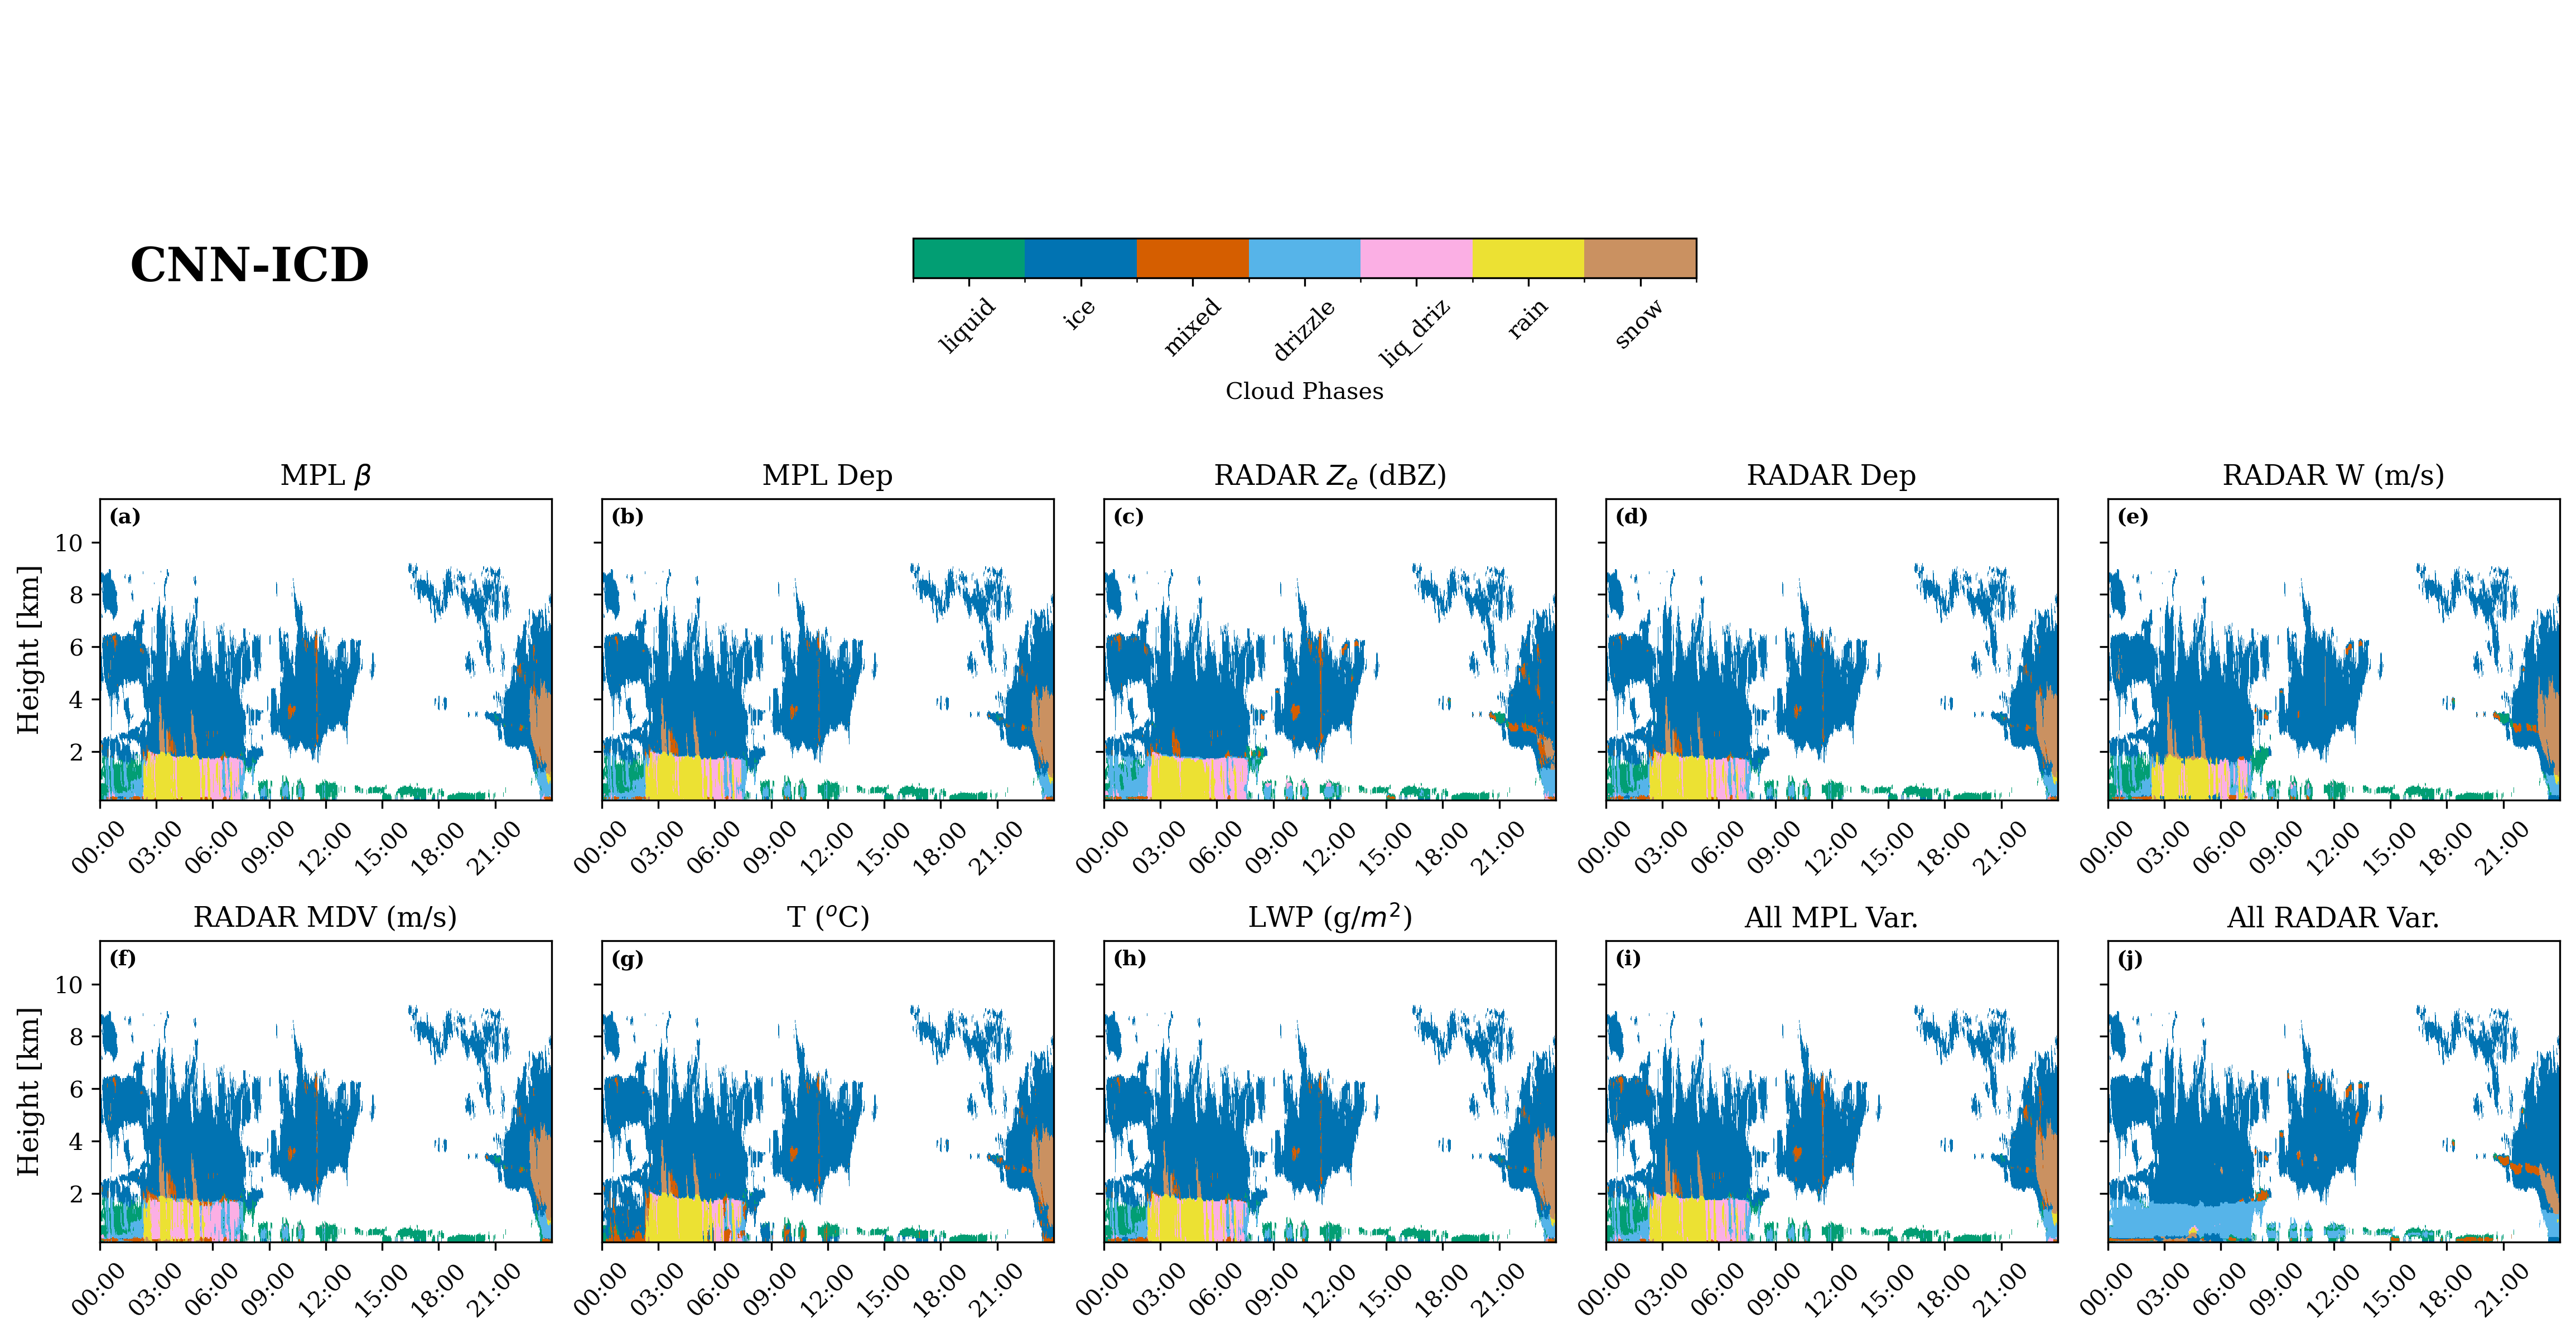

In [ ]:
with plt.style.context("/home/goldberger/style.mplstyle"):
    # Create a figure
    fig = plt.figure(figsize=(15, 12))

    print('Case Study of Model Comparison \n ' + pd.to_datetime(ds.time[0].values).strftime('%B %d, %Y') + ', ARM Site ' + FILE_GLOB[0:3])

    # Create subplots
    axs = []
    for pos in positions:
        ax = fig.add_axes(pos)  # Create an axes at the specified position
        axs.append(ax)

    # Colorbar
    create_small_colorbar(axs[10])#create_confidence_timeseries_colorbar('cnn_20240501_090456_confidence', axs[17], ds)
    axs[10].axis('off')

    axs[0].text(x=-.8,y=-.35,s="CNN-ICD",transform=ax.transAxes, verticalalignment="center_baseline",horizontalalignment="left",fontweight="bold",fontsize=20)

    #
    # 
    dropout = '_mpl_b'
    ax = axs[0]
    create_timeseries_no_unknown('cnn_20240429_213223' + dropout,ax, ds, PHASE_MAP, custom_colors); ax.set_title(r"MPL $\beta$")
    ax.set_ylabel('Height [km]',fontsize =12)
    # 
    dropout = '_mpl_ldr'
    ax = axs[1]
    create_timeseries_no_unknown('cnn_20240429_213223' + dropout,ax, ds, PHASE_MAP, custom_colors); ax.set_yticklabels([]); ax.set_title("MPL Dep")
    # 
    dropout = '_rad_ref'
    ax = axs[2]
    create_timeseries_no_unknown('cnn_20240429_213223' + dropout,ax, ds, PHASE_MAP, custom_colors); ax.set_yticklabels([]); ax.set_title("RADAR $Z_e$ (dBZ)")
    # 
    dropout = '_rad_ldr'
    ax = axs[3]
    create_timeseries_no_unknown('cnn_20240429_213223' + dropout,ax, ds, PHASE_MAP, custom_colors); ax.set_yticklabels([]); ax.set_title("RADAR Dep")
    # 
    dropout = '_rad_spec'
    ax = axs[4]
    create_timeseries_no_unknown('cnn_20240429_213223' + dropout,ax, ds, PHASE_MAP, custom_colors); ax.set_yticklabels([]); ax.set_title("RADAR W (m/s)")
    #
    dropout = '_rad_mdv'
    ax = axs[5]
    create_timeseries_no_unknown('cnn_20240429_213223' + dropout,ax, ds, PHASE_MAP, custom_colors); ax.set_title("RADAR MDV (m/s)")
    ax.set_ylabel('Height [km]',fontsize =12)
    # 
    dropout = '_sonde'
    ax = axs[6]
    create_timeseries_no_unknown('cnn_20240429_213223' + dropout,ax, ds, PHASE_MAP, custom_colors); ax.set_yticklabels([]); ax.set_title("T ($^o$C)")
    # 
    dropout = '_mwr'
    ax = axs[7]
    create_timeseries_no_unknown('cnn_20240429_213223' + dropout,ax, ds, PHASE_MAP, custom_colors); ax.set_yticklabels([]); ax.set_title("LWP (g/$m^2$)")
    # 
    dropout = '_mpl'
    ax = axs[8]
    create_timeseries_no_unknown('cnn_20240429_213223' + dropout,ax, ds, PHASE_MAP, custom_colors); ax.set_yticklabels([]); ax.set_title("All MPL Var.")
    # 
    dropout = '_rad'
    ax = axs[9]
    create_timeseries_no_unknown('cnn_20240429_213223' + dropout,ax, ds, PHASE_MAP, custom_colors); ax.set_yticklabels([]); ax.set_title("All RADAR Var.")
    

    #         # Add letter to top-left of each subplot
    for i, ax in enumerate(axs):
        ax.text(
            x=0.02,  # Position near the left side of the subplot
            y=0.97,   # Position near the top of the subplot
            s=letters[i],  # Corresponding letter for each subplot
            transform=ax.transAxes,  # Coordinates are in axes-relative units
            verticalalignment="top",
            horizontalalignment="left",
            fontweight="bold",
            fontsize=9
        )

# Figures S4 and S5

In [14]:
# Define the positions for each subplot
# The positions are defined as [left, bottom, width, height]
heights = .12#0.2
hist_pos = 0.33
conf_pos = .5
matrix_pos = 0.71

height = 0.11#0.15
width = 0.18#0.14

start_height = 0.15

col1 = 0.1
col2 = 0.3
col3 = 0.5
col4 = 0.7
col5 = 0.9
x = 0.07

positions = [
    # Row 1 Time Series

    [col1, start_height +  heights * 4, width, height],   # Subplot 0
    [col2, start_height +  heights * 4, width, height],   # Subplot 1
    [col3, start_height +  heights * 4, width, height],   # Subplot 2
    [col4, start_height +  heights * 4, width, height],   # Subplot 3

    [col1, start_height +  heights * 3, width, height],   # Subplot 0
    [col2, start_height +  heights * 3, width, height],   # Subplot 1
    [col3, start_height +  heights * 3, width, height],   # Subplot 2
    [col4, start_height +  heights * 3, width, height],   # Subplot 3

    # Row 2 Histogram
    [col1, start_height +  heights * 2, width, height],  # Subplot 5
    [col2, start_height +  heights * 2, width, height],  # Subplot 6
    [col3, start_height +  heights * 2, width, height],  # Subplot 7
    [col4, start_height +  heights * 2, width, height],  # Subplot 8
    # [col5, start_height +  heights * 2, width, height],  # Subplot 8
    # Row 3 Confidence Time Series
    [col1, start_height +  heights * 1 , width, height],   # Subplot 9
    [col2, start_height +  heights * 1 , width, height],   # Subplot 10
    [col3, start_height +  heights * 1 , width, height],  # Subplot 11
    [col4, start_height +  heights * 1 , width, height],   # Subplot 12
    #[col5, start_height +  heights * 1 , width, height],   # Subplot 12
    # Row 4 Matrix
    
    [col1, start_height, width, height],  # Subplot 13
    [col2, start_height, width, height],  # Subplot 14
    [col3, start_height, width, height],  # Subplot 15
    [col4, start_height, width, height],  # Subplot 16
    #[col5, start_height, width, height],  # Subplot 16
    # Colorbar
    # [0.05, start_height +  heights * 1.6, 0.2, 0.13], # Subplot 4
    # Colorbar
    [0.05, start_height +  heights * 5.4, 0.2, 0.13] # Subplot 17
]

letters = ['(a)', '(b)', '(c)', '(d)','(e)', '(f)', '(g)', '(h)', '(i)', '(j)', '(k)','(l)', '(m)','(n)','(o)', '(p)','(q)','(r)','(s)','(t)','']

Case Study of Model Comparison 
 September 05, 2021, ARM Site nsa


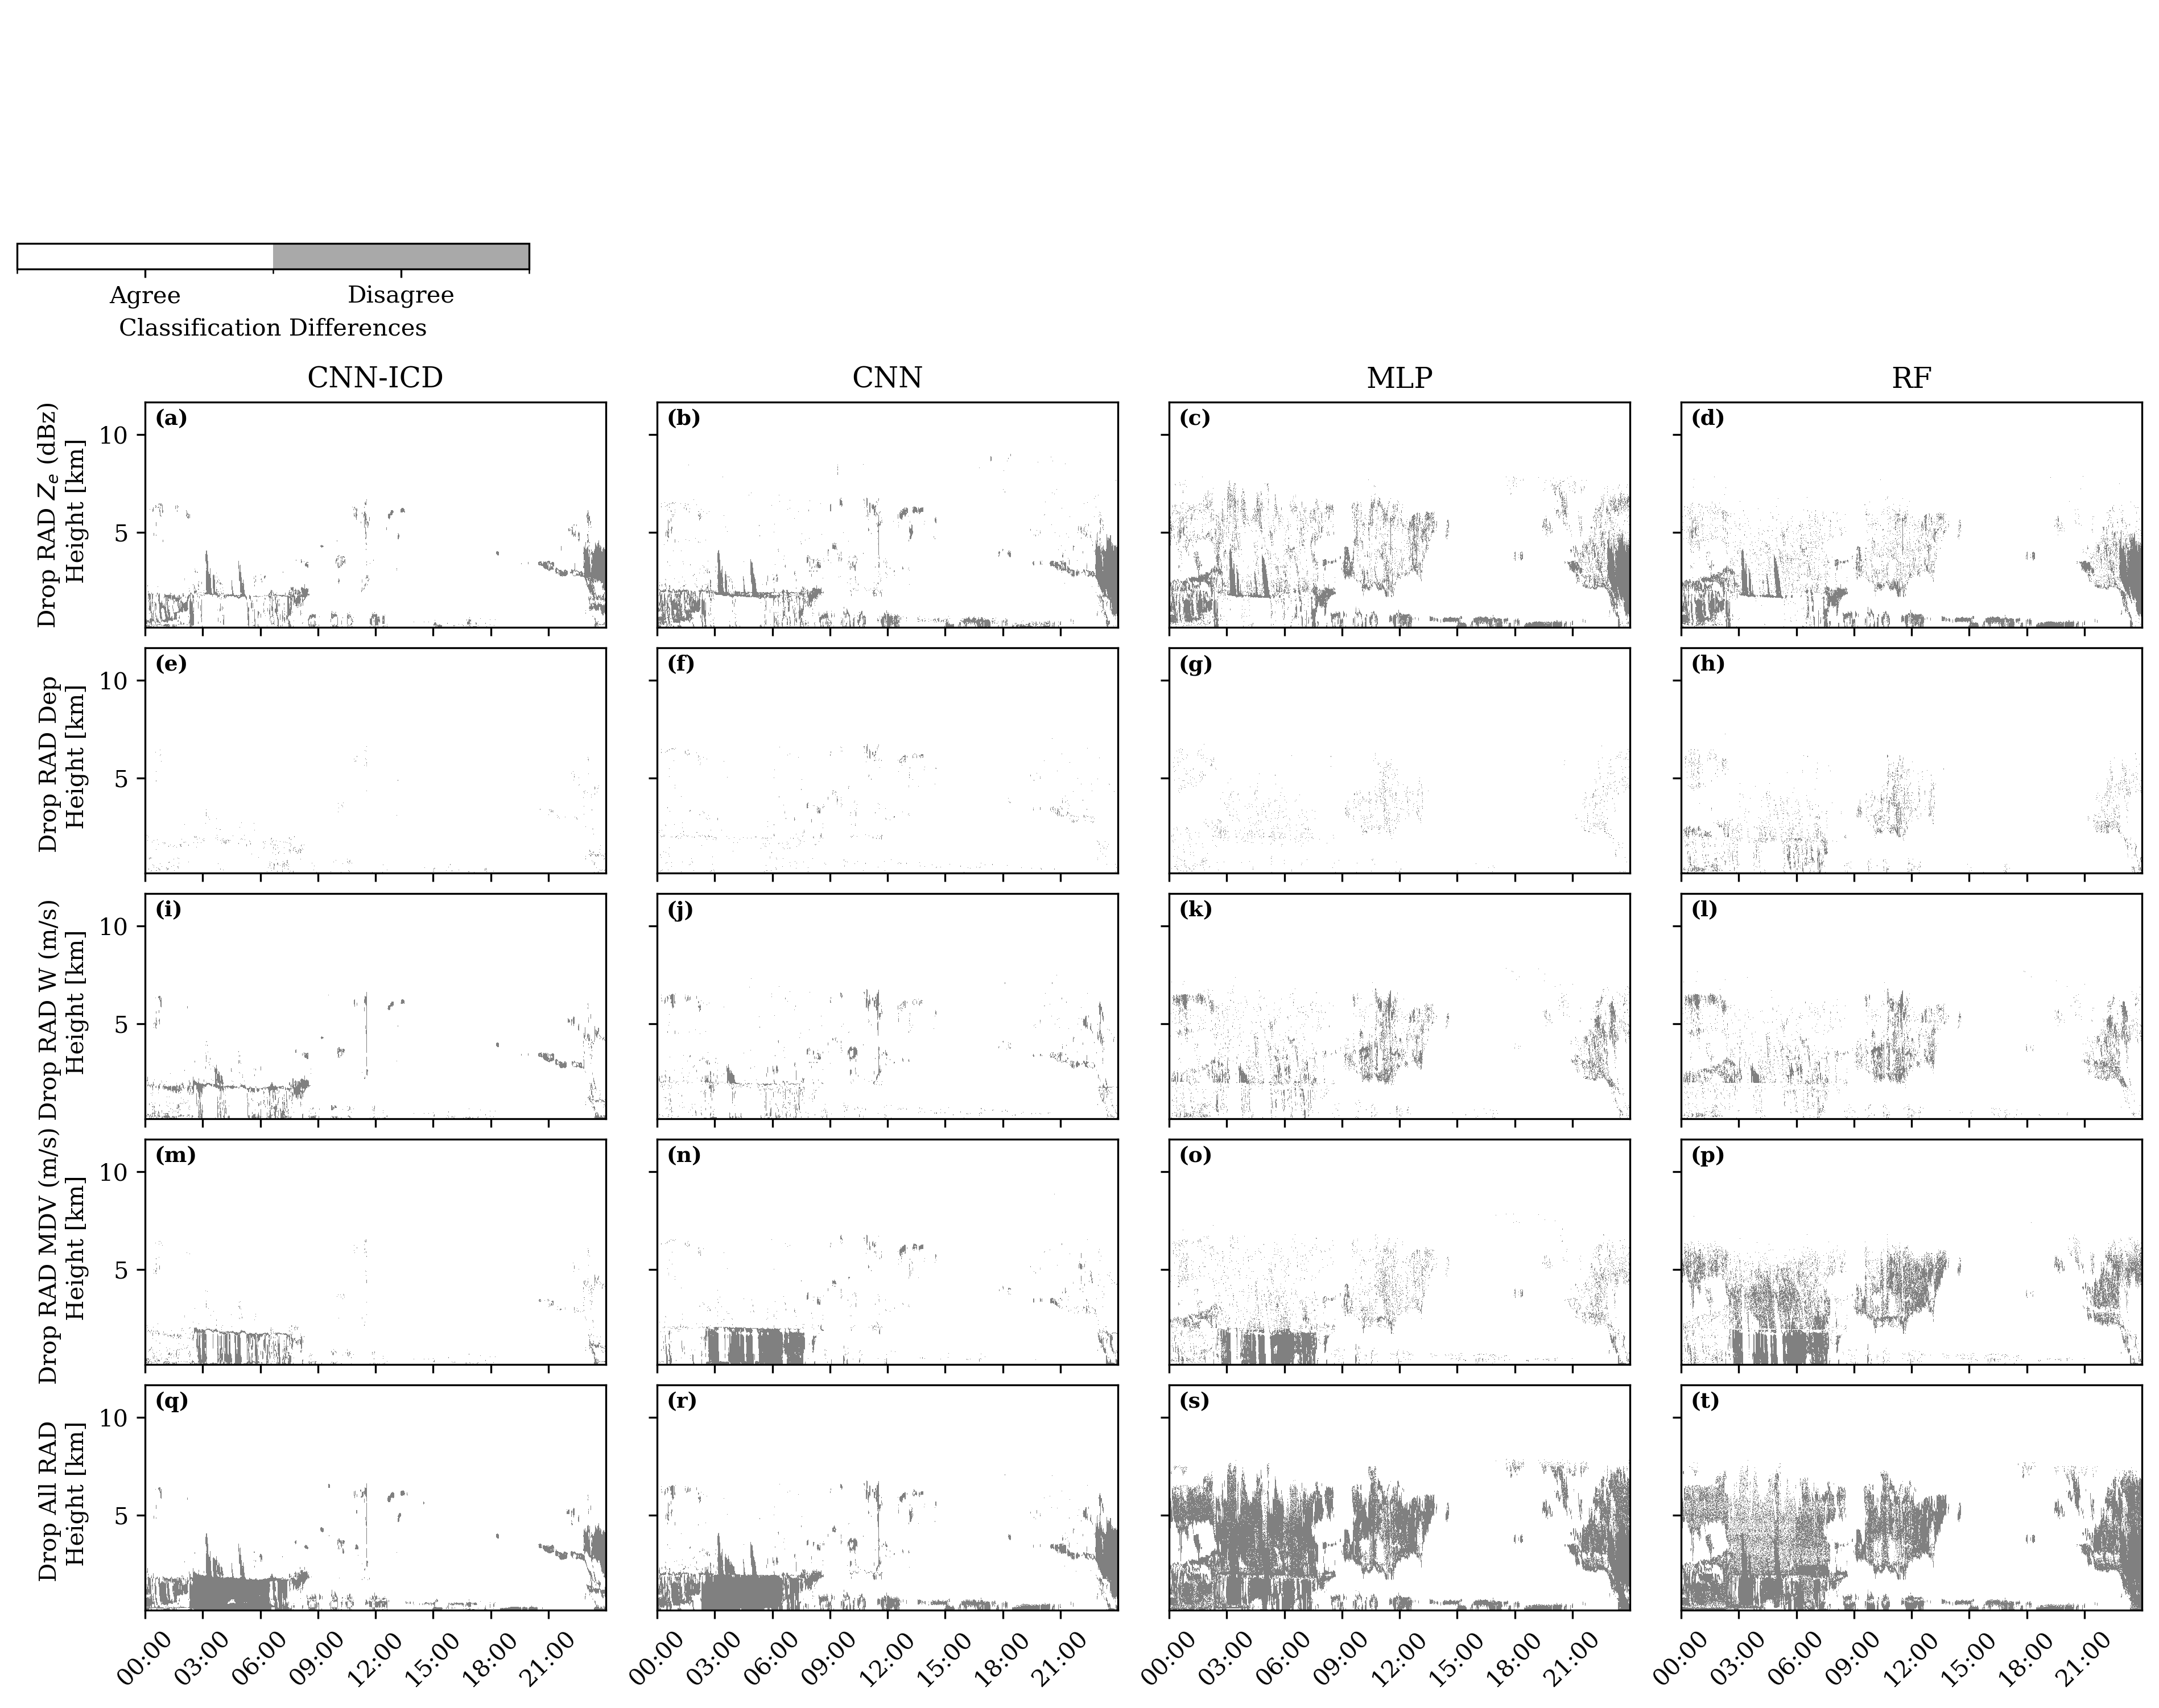

In [15]:
with plt.style.context("/home/goldberger/style.mplstyle"):
    # Create a figure
    fig = plt.figure(figsize=(15, 12))

    print('Case Study of Model Comparison \n ' + pd.to_datetime(ds.time[0].values).strftime('%B %d, %Y') + ', ARM Site ' + FILE_GLOB[0:3])

    # Create subplots
    axs = []
    for pos in positions:
        ax = fig.add_axes(pos)  # Create an axes at the specified position
        axs.append(ax)

    # Colorbar

    create_tf_colorbar(axs[20])#create_confidence_timeseries_colorbar('cnn_20240501_090456_confidence', axs[17], ds)
    axs[20].axis('off')


    ### ROW1
    # Variable possibilities mpl_b mpl_ldr rad_ref rad_ldr rad_spec rad_mdv sonde mwr mpl rad
    dropout = '_rad_ref'
    # CCN Dropouts
    ax = axs[0]
    ds['dif'] = ds['cnn_20240429_213223'] - ds['cnn_20240429_213223' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_title('CNN-ICD');ax.set_ylabel('Drop RAD $Z_e$ (dBz) \n Height [km]');ax.set_xticklabels([])
    # CCN
    ax = axs[1]
    ds['dif'] = ds['cnn_20240501_090456'] - ds['cnn_20240501_090456' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('CNN');ax.set_ylabel('');ax.set_xticklabels([])
    # MLP
    ax = axs[2]
    ds['dif'] = ds['mlp_1600k_20240514_052837'] - ds['mlp_1600k_20240514_052837' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('MLP');ax.set_ylabel('');ax.set_xticklabels([])
    # RF
    ax = axs[3]
    ds['dif'] = ds['rf_1600k_20240514_033147'] - ds['rf_1600k_20240514_033147' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('RF');ax.set_ylabel('');ax.set_xticklabels([])
    ### ROW2
        # Variable possibilities mpl_b mpl_ldr rad_ref rad_ldr rad_spec rad_mdv sonde mwr mpl rad
    dropout = '_rad_ldr'
    # CCN Dropouts
    ax = axs[4]
    ds['dif'] = ds['cnn_20240429_213223'] - ds['cnn_20240429_213223' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_title('');ax.set_ylabel('Drop RAD Dep \n Height [km]');ax.set_xticklabels([])
    # CCN
    ax = axs[5]
    ds['dif'] = ds['cnn_20240501_090456'] - ds['cnn_20240501_090456' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('');ax.set_xticklabels([])
    # MLP
    ax = axs[6]
    ds['dif'] = ds['mlp_1600k_20240514_052837'] - ds['mlp_1600k_20240514_052837' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('');ax.set_xticklabels([])
    # RF
    ax = axs[7]
    ds['dif'] = ds['rf_1600k_20240514_033147'] - ds['rf_1600k_20240514_033147' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('');ax.set_xticklabels([])
    #### ROW3
        # Variable possibilities mpl_b mpl_ldr rad_ref rad_ldr rad_spec rad_mdv sonde mwr mpl rad
    dropout = '_rad_spec'
    # CCN Dropouts
    ax = axs[8]
    ds['dif'] = ds['cnn_20240429_213223'] - ds['cnn_20240429_213223' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_title('');ax.set_ylabel('Drop RAD W (m/s) \n Height [km]');ax.set_xticklabels([])
    # CCN
    ax = axs[9]
    ds['dif'] = ds['cnn_20240501_090456'] - ds['cnn_20240501_090456' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('');ax.set_xticklabels([])
    # MLP
    ax = axs[10]
    ds['dif'] = ds['mlp_1600k_20240514_052837'] - ds['mlp_1600k_20240514_052837' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('');ax.set_xticklabels([])
    # RF
    ax = axs[11]
    ds['dif'] = ds['rf_1600k_20240514_033147'] - ds['rf_1600k_20240514_033147' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('');ax.set_xticklabels([])
    #### ROW4
        # Variable possibilities mpl_b mpl_ldr rad_ref rad_ldr rad_spec rad_mdv sonde mwr mpl rad
    dropout = '_rad_mdv'
    # CCN Dropouts
    ax = axs[12]
    ds['dif'] = ds['cnn_20240429_213223'] - ds['cnn_20240429_213223' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_title('');ax.set_ylabel('Drop RAD MDV (m/s) \n Height [km]');ax.set_xticklabels([])
    # CCN
    ax = axs[13]
    ds['dif'] = ds['cnn_20240501_090456'] - ds['cnn_20240501_090456' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('');ax.set_xticklabels([])
    # MLP
    ax = axs[14]
    ds['dif'] = ds['mlp_1600k_20240514_052837'] - ds['mlp_1600k_20240514_052837' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('');ax.set_xticklabels([])
    # RF
    ax = axs[15]
    ds['dif'] = ds['rf_1600k_20240514_033147'] - ds['rf_1600k_20240514_033147' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('');ax.set_xticklabels([])
    #### ROW5
        # Variable possibilities mpl_b mpl_ldr rad_ref rad_ldr rad_spec rad_mdv sonde mwr mpl rad
    dropout = '_rad'
    # CCN Dropouts
    ax = axs[16]
    ds['dif'] = ds['cnn_20240429_213223'] - ds['cnn_20240429_213223' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_title('');ax.set_ylabel('Drop All RAD \n Height [km]')
    # CCN
    ax = axs[17]
    ds['dif'] = ds['cnn_20240501_090456'] - ds['cnn_20240501_090456' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('')
    # MLP
    ax = axs[18]
    ds['dif'] = ds['mlp_1600k_20240514_052837'] - ds['mlp_1600k_20240514_052837' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('')
    # RF
    ax = axs[19]
    ds['dif'] = ds['rf_1600k_20240514_033147'] - ds['rf_1600k_20240514_033147' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('')

        # Add letter to top-left of each subplot
    for i, ax in enumerate(axs):
        ax.text(
            x=0.02,  # Position near the left side of the subplot
            y=0.97,   # Position near the top of the subplot
            s=letters[i],  # Corresponding letter for each subplot
            transform=ax.transAxes,  # Coordinates are in axes-relative units
            verticalalignment="top",
            horizontalalignment="left",
            fontweight="bold",
            fontsize=9
        )

Case Study of Model Comparison 
 September 05, 2021, ARM Site nsa


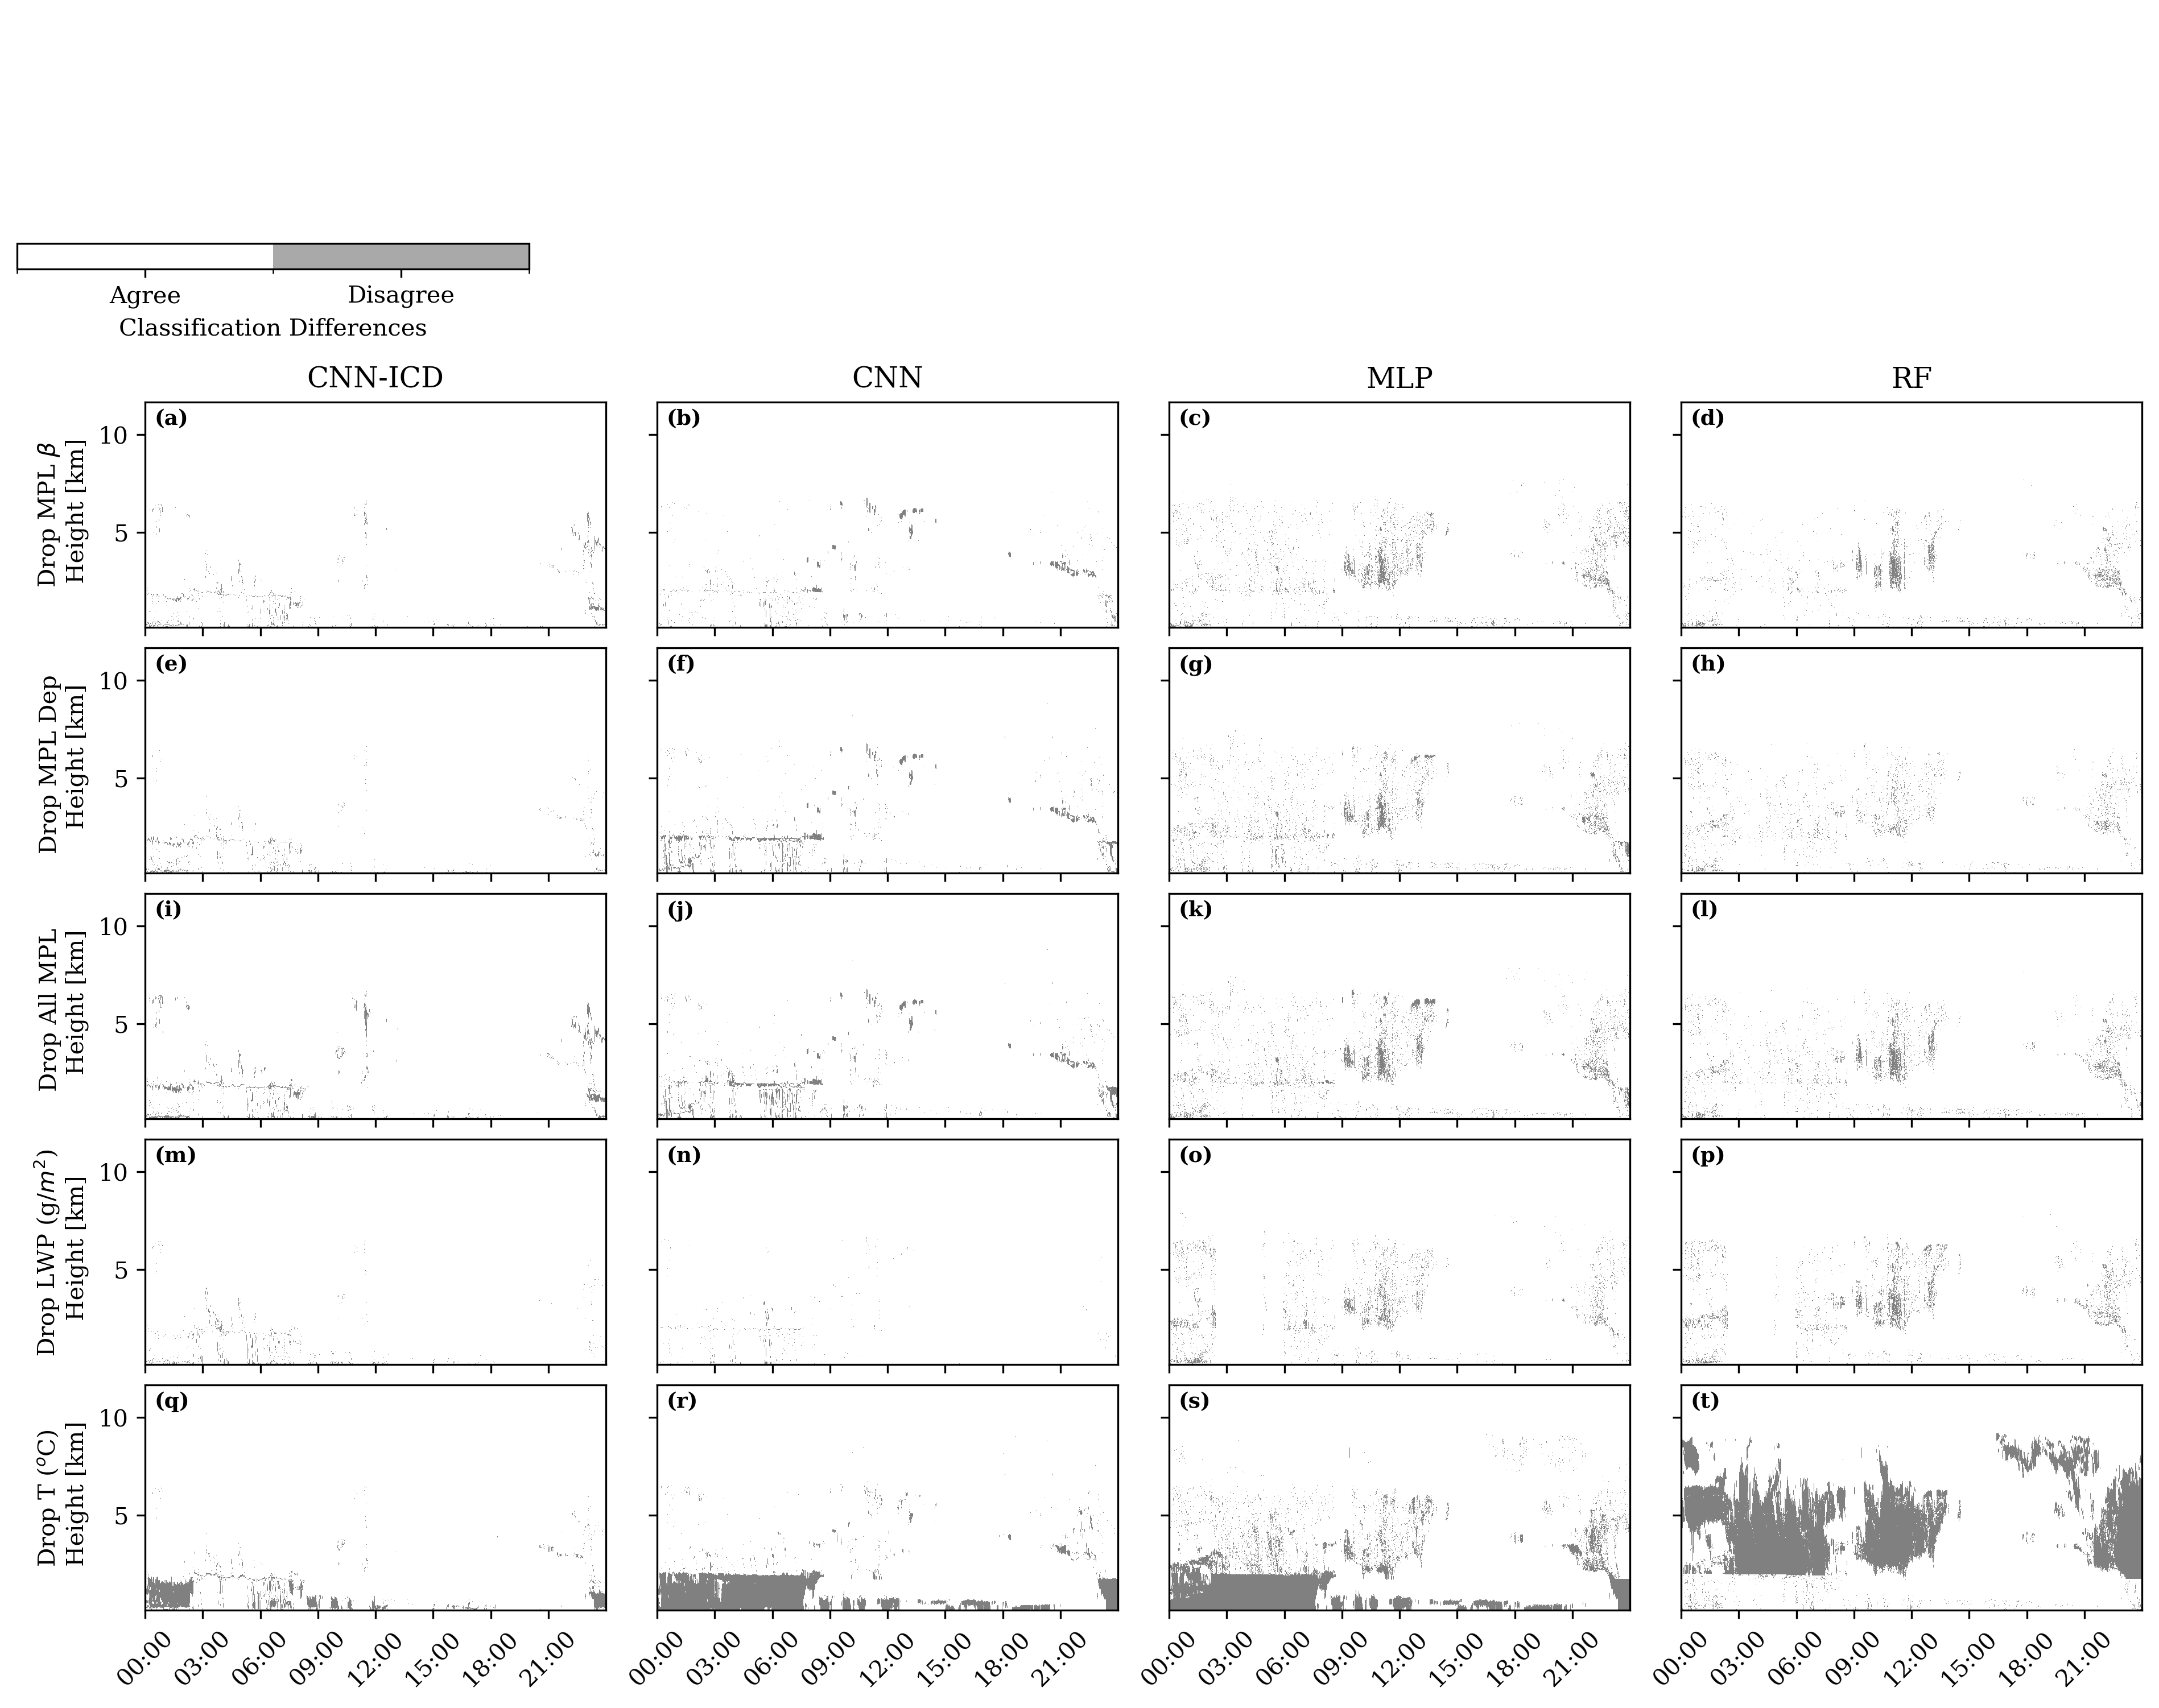

In [16]:
with plt.style.context("/home/goldberger/style.mplstyle"):
    # Create a figure
    fig = plt.figure(figsize=(15, 12))

    print('Case Study of Model Comparison \n ' + pd.to_datetime(ds.time[0].values).strftime('%B %d, %Y') + ', ARM Site ' + FILE_GLOB[0:3])

    # Create subplots
    axs = []
    for pos in positions:
        ax = fig.add_axes(pos)  # Create an axes at the specified position
        axs.append(ax)

    # Colorbar

    create_tf_colorbar(axs[20])#create_confidence_timeseries_colorbar('cnn_20240501_090456_confidence', axs[17], ds)
    axs[20].axis('off')


    ### ROW1
    # Variable possibilities mpl_b mpl_ldr rad_ref rad_ldr rad_spec rad_mdv sonde mwr mpl rad
    dropout = '_mpl_b'
    # CCN Dropouts
    ax = axs[0]
    ds['dif'] = ds['cnn_20240429_213223'] - ds['cnn_20240429_213223' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_title('CNN-ICD');ax.set_ylabel(r'Drop MPL $\beta$' + '\n Height [km]');ax.set_xticklabels([])#r"MPL $\beta$"
    # CCN
    ax = axs[1]
    ds['dif'] = ds['cnn_20240501_090456'] - ds['cnn_20240501_090456' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('CNN');ax.set_ylabel('');ax.set_xticklabels([])
    # MLP
    ax = axs[2]
    ds['dif'] = ds['mlp_1600k_20240514_052837'] - ds['mlp_1600k_20240514_052837' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('MLP');ax.set_ylabel('');ax.set_xticklabels([])
    # RF
    ax = axs[3]
    ds['dif'] = ds['rf_1600k_20240514_033147'] - ds['rf_1600k_20240514_033147' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('RF');ax.set_ylabel('');ax.set_xticklabels([])
    ### ROW2
        # Variable possibilities mpl_b mpl_ldr rad_ref rad_ldr rad_spec rad_mdv sonde mwr mpl rad
    dropout = '_mpl_ldr'
    # CCN Dropouts
    ax = axs[4]
    ds['dif'] = ds['cnn_20240429_213223'] - ds['cnn_20240429_213223' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_title('');ax.set_ylabel('Drop MPL Dep \n Height [km]');ax.set_xticklabels([])
    # CCN
    ax = axs[5]
    ds['dif'] = ds['cnn_20240501_090456'] - ds['cnn_20240501_090456' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('');ax.set_xticklabels([])
    # MLP
    ax = axs[6]
    ds['dif'] = ds['mlp_1600k_20240514_052837'] - ds['mlp_1600k_20240514_052837' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('');ax.set_xticklabels([])
    # RF
    ax = axs[7]
    ds['dif'] = ds['rf_1600k_20240514_033147'] - ds['rf_1600k_20240514_033147' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('');ax.set_xticklabels([])
    #### ROW3
        # Variable possibilities mpl_b mpl_ldr rad_ref rad_ldr rad_spec rad_mdv sonde mwr mpl rad
    dropout = '_mpl'
    # CCN Dropouts
    ax = axs[8]
    ds['dif'] = ds['cnn_20240429_213223'] - ds['cnn_20240429_213223' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_title('');ax.set_ylabel('Drop All MPL \n Height [km]');ax.set_xticklabels([])
    # CCN
    ax = axs[9]
    ds['dif'] = ds['cnn_20240501_090456'] - ds['cnn_20240501_090456' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('');ax.set_xticklabels([])
    # MLP
    ax = axs[10]
    ds['dif'] = ds['mlp_1600k_20240514_052837'] - ds['mlp_1600k_20240514_052837' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('');ax.set_xticklabels([])
    # RF
    ax = axs[11]
    ds['dif'] = ds['rf_1600k_20240514_033147'] - ds['rf_1600k_20240514_033147' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('');ax.set_xticklabels([])
    #### ROW4
        # Variable possibilities mpl_b mpl_ldr rad_ref rad_ldr rad_spec rad_mdv sonde mwr mpl rad
    dropout = '_mwr'
    # CCN Dropouts
    ax = axs[12]
    ds['dif'] = ds['cnn_20240429_213223'] - ds['cnn_20240429_213223' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_title('');ax.set_ylabel('Drop LWP (g/$m^2$) \n Height [km]');ax.set_xticklabels([])
    # CCN
    ax = axs[13]
    ds['dif'] = ds['cnn_20240501_090456'] - ds['cnn_20240501_090456' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('');ax.set_xticklabels([])
    # MLP
    ax = axs[14]
    ds['dif'] = ds['mlp_1600k_20240514_052837'] - ds['mlp_1600k_20240514_052837' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('');ax.set_xticklabels([])
    # RF
    ax = axs[15]
    ds['dif'] = ds['rf_1600k_20240514_033147'] - ds['rf_1600k_20240514_033147' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('');ax.set_xticklabels([])
    #### ROW5
        # Variable possibilities mpl_b mpl_ldr rad_ref rad_ldr rad_spec rad_mdv sonde mwr mpl rad
    dropout = '_sonde'
    # CCN Dropouts
    ax = axs[16]
    ds['dif'] = ds['cnn_20240429_213223'] - ds['cnn_20240429_213223' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_title('');ax.set_ylabel('Drop T ($^o$C) \n Height [km]')
    # CCN
    ax = axs[17]
    ds['dif'] = ds['cnn_20240501_090456'] - ds['cnn_20240501_090456' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('')
    # MLP
    ax = axs[18]
    ds['dif'] = ds['mlp_1600k_20240514_052837'] - ds['mlp_1600k_20240514_052837' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('')
    # RF
    ax = axs[19]
    ds['dif'] = ds['rf_1600k_20240514_033147'] - ds['rf_1600k_20240514_033147' + dropout];ds['dif'] = ds['dif'].where(ds['dif'] == 0, 1)
    create_timeseries_no_unknown('dif',ax, ds, {0: "Agree",1: "Disagree"}, ["white","gray"])
    ax.set_yticklabels([]); ax.set_title('');ax.set_ylabel('')

        # Add letter to top-left of each subplot
    for i, ax in enumerate(axs):
        ax.text(
            x=0.02,  # Position near the left side of the subplot
            y=0.97,   # Position near the top of the subplot
            s=letters[i],  # Corresponding letter for each subplot
            transform=ax.transAxes,  # Coordinates are in axes-relative units
            verticalalignment="top",
            horizontalalignment="left",
            fontweight="bold",
            fontsize=9
        )